In [118]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
# from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
# from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing data
filepath = './NSE-TATAGLOBAL11.csv'
df = pd.read_csv(filepath, parse_dates = True,index_col=0)

In [5]:
# checking data
df.head(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
# Statistical Summary
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


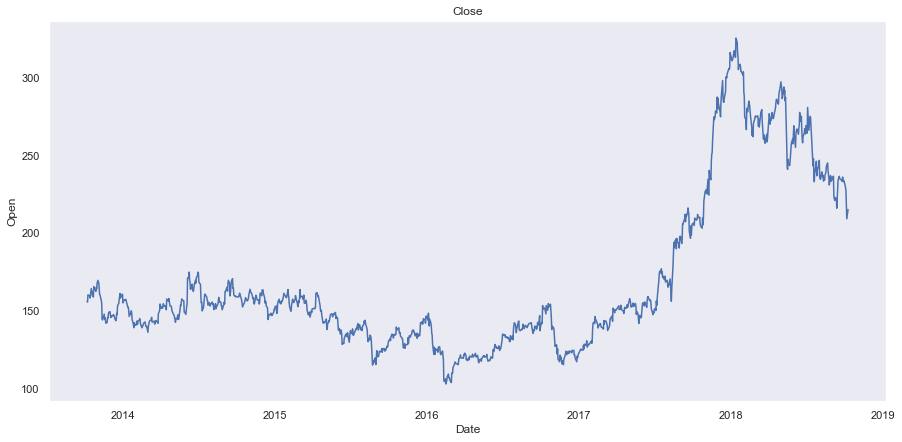

In [7]:
# time series
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
# plt.plot(df.Open)
plt.plot(df.Close)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Close')
plt.show()

In [22]:
# separating independent variables from dependent variable
df_features = df.drop(['Close', 'Total Trade Quantity', 'Turnover (Lacs)'], axis=1)
X = df_features.values
y = df['Close'].values

In [36]:
X
X.shape

(1235, 4)

In [35]:
y

array([215.15, 209.2 , 218.2 , ..., 160.15, 155.55, 155.8 ])

In [116]:
X_train = X[0:988]
y_train = y[0:988]
X_test = X[988:]
y_test = y[988:]

In [121]:
#linear regression model
linear_reg = LinearRegression(normalize=True)
linear_reg.fit(X_train, y_train)
linear_prediction = linear_reg.predict(X_test)
linear_score = linear_reg.score(X_test,y_test)*100
print('linear_score:',format(linear_score, '.3f'))

linear_cv = cross_val_score(linear_reg, X, y, cv = 5)
linear_cv_score = np.mean(linear_cv)*100
print('linear_cv_score:',format(linear_cv_score, '.3f'))

linear_error = mean_absolute_error(y_test, linear_prediction)
print('linear_error:',format(linear_error, '.3f'))

linear_reg_mse = mean_squared_error(y_test, linear_prediction)
print('MSE:', format(linear_reg_mse,'.3f'))

linear_score: 99.840
linear_cv_score: 99.919
linear_error: 0.260
MSE: 0.124


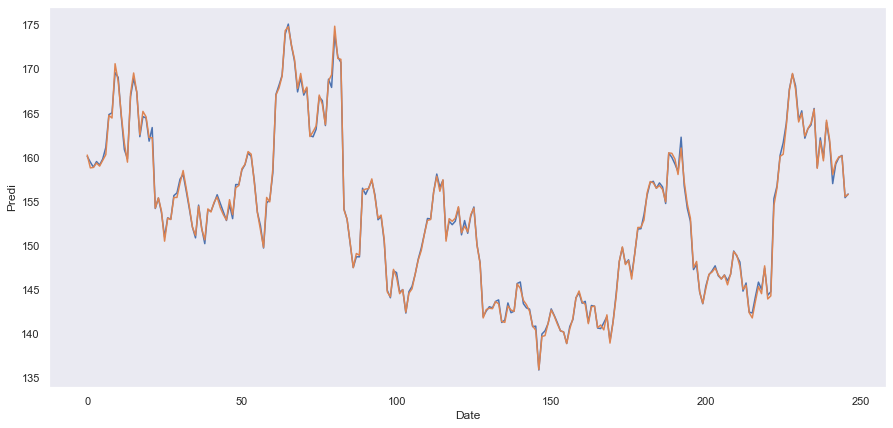

In [122]:
sns.set(style = 'dark')
plt.figure(figsize = [15, 7])
plt.plot(linear_prediction)
plt.plot(y_test)
plt.xlabel('Date')
plt.ylabel('Predi')
plt.show()